In [22]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="Set2")

In [23]:
# 2. Load dataset
df = pd.read_csv("/Users/apple/Desktop/BusinessIntelligence/FinalProject/UnitedHealthcare_Cleaned.csv")
print("Shape:", df.shape)
df.head()

Shape: (55500, 15)


,patient_name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Laura Tate,84,Male,B,Hypertension,03/12/22,Angela Hernandez,Abbott and Thompson Sullivan,Blue Cross,16739,278,Elective,29/12/22,Aspirin,Normal
1,Ronald Hubbard,59,Female,O+,Arthritis,07/05/22,Brandi Lucas,Abbott,Medicare,38052,467,Elective,10/05/22,Lipitor,Abnormal
2,Heather Smith,59,Male,O,Arthritis,01/08/22,Jessica Arnold,Abbott,UnitedHealthcare,29878,198,Emergency,20/08/22,Paracetamol,Normal
3,Kimberly Carr,39,Male,AB+,Obesity,25/08/22,Jordan Black,Abbott Moore and Williams,UnitedHealthcare,24800,490,Emergency,19/09/22,Lipitor,onclusive
4,James Lambert,83,Male,A,Arthritis,31/07/20,Brian Roberts,Abbott Castillo,UnitedHealthcare,18398,144,Urgent,25/08/20,Ibuprofen,Abnormal


In [24]:
# 3. Overview
df.info()
df.describe()
df.isnull().sum()
# Shape + memory
df.shape
df.info()
df.memory_usage(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_name        55500 non-null  object
 1   age                 55500 non-null  int64 
 2   gender              55500 non-null  object
 3   blood_type          55500 non-null  object
 4   medical_condition   55500 non-null  object
 5   date_of_admission   55500 non-null  object
 6   doctor              55500 non-null  object
 7   hospital            55500 non-null  object
 8   insurance_provider  55500 non-null  object
 9   billing_amount      55500 non-null  int64 
 10  room_number         55500 non-null  object
 11  admission_type      55500 non-null  object
 12  discharge_date      55500 non-null  object
 13  medication          55500 non-null  object
 14  test_results        55088 non-null  object
dtypes: int64(2), object(13)
memory usage: 6.4+ MB
<class 'pandas.core.fram

Index                     132
patient_name          3456090
age                    444000
gender                2996952
blood_type            2844392
medical_condition     3163733
date_of_admission     3163500
doctor                3456165
hospital              3521655
insurance_provider    3208132
billing_amount         444000
room_number           2887918
admission_type        3144759
discharge_date        3163784
medication            3207328
test_results          3134652
dtype: int64

In [ ]:
# 4. Cleaning
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df["billing_amount"] = df["billing_amount"].replace(r"[\$,]", "", regex=True).astype(float)
df["room_number"] = pd.to_numeric(df["room_number"], errors="coerce")
df["date_of_admission"] = pd.to_datetime(df["date_of_admission"], format="%d/%m/%y", errors="coerce")
df["discharge_date"] = pd.to_datetime(df["discharge_date"], format="%d/%m/%y", errors="coerce")
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["test_results"] = df["test_results"].replace("", np.nan)
df["test_results"] = df["test_results"].fillna("Unknown")

# Drop rows missing essential fields
df.dropna(subset=["age", "date_of_admission", "discharge_date"], inplace=True)
# Duplicate check
df.duplicated().sum()
df = df.drop_duplicates()
df.head()

,patient_name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Laura Tate,84,Male,B,Hypertension,2022-12-03,Angela Hernandez,Abbott and Thompson Sullivan,Blue Cross,16739.0,278.0,Elective,2022-12-29,Aspirin,Normal
1,Ronald Hubbard,59,Female,O+,Arthritis,2022-05-07,Brandi Lucas,Abbott,Medicare,38052.0,467.0,Elective,2022-05-10,Lipitor,Abnormal
2,Heather Smith,59,Male,O,Arthritis,2022-08-01,Jessica Arnold,Abbott,UnitedHealthcare,29878.0,198.0,Emergency,2022-08-20,Paracetamol,Normal
3,Kimberly Carr,39,Male,AB+,Obesity,2022-08-25,Jordan Black,Abbott Moore and Williams,UnitedHealthcare,24800.0,490.0,Emergency,2022-09-19,Lipitor,onclusive
4,James Lambert,83,Male,A,Arthritis,2020-07-31,Brian Roberts,Abbott Castillo,UnitedHealthcare,18398.0,144.0,Urgent,2020-08-25,Ibuprofen,Abnormal


In [8]:
# 5. Feature engineering
df["length_of_stay"] = (df["discharge_date"] - df["date_of_admission"]).dt.days
df["age_bin_5"] = ((df["age"] - 10) // 5) * 5 + 10
df["age_group_10"] = (df["age"] // 10) * 10
df["admission_month"] = df["date_of_admission"].dt.month
df["admission_year"] = df["date_of_admission"].dt.year
df.head()

,patient_name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,length_of_stay,age_bin_5,age_group_10,admission_month,admission_year
0,Laura Tate,84,Male,B,Hypertension,2022-12-03,Angela Hernandez,Abbott and Thompson Sullivan,Blue Cross,16739.0,278.0,Elective,2022-12-29,Aspirin,Normal,26,80,80,12,2022
1,Ronald Hubbard,59,Female,O+,Arthritis,2022-05-07,Brandi Lucas,Abbott,Medicare,38052.0,467.0,Elective,2022-05-10,Lipitor,Abnormal,3,55,50,5,2022
2,Heather Smith,59,Male,O,Arthritis,2022-08-01,Jessica Arnold,Abbott,UnitedHealthcare,29878.0,198.0,Emergency,2022-08-20,Paracetamol,Normal,19,55,50,8,2022
3,Kimberly Carr,39,Male,AB+,Obesity,2022-08-25,Jordan Black,Abbott Moore and Williams,UnitedHealthcare,24800.0,490.0,Emergency,2022-09-19,Lipitor,onclusive,25,35,30,8,2022
4,James Lambert,83,Male,A,Arthritis,2020-07-31,Brian Roberts,Abbott Castillo,UnitedHealthcare,18398.0,144.0,Urgent,2020-08-25,Ibuprofen,Abnormal,25,80,80,7,2020


In [19]:
# Detect outliers for all numeric columns using IQR
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'age': 0,
 'billing_amount': 0,
 'room_number': 0,
 'length_of_stay': 0,
 'age_bin_5': 0,
 'age_group_10': 0}

In [ ]:
# Summary Tables for BI Insights
# Billing by condition:
df.groupby("medical_condition")["billing_amount"].mean().sort_values(ascending=False)

# Avg LOS by condition:
df.groupby("medical_condition")["length_of_stay"].mean().sort_values(ascending=False)

# Revenue by insurance provider:
df.groupby("insurance_provider")["billing_amount"].sum().sort_values(ascending=False)

insurance_provider
Cigna               287122516.0
Medicare            285690557.0
Blue Cross          283229826.0
UnitedHealthcare    282425280.0
Aetna               278847734.0
Name: billing_amount, dtype: float64

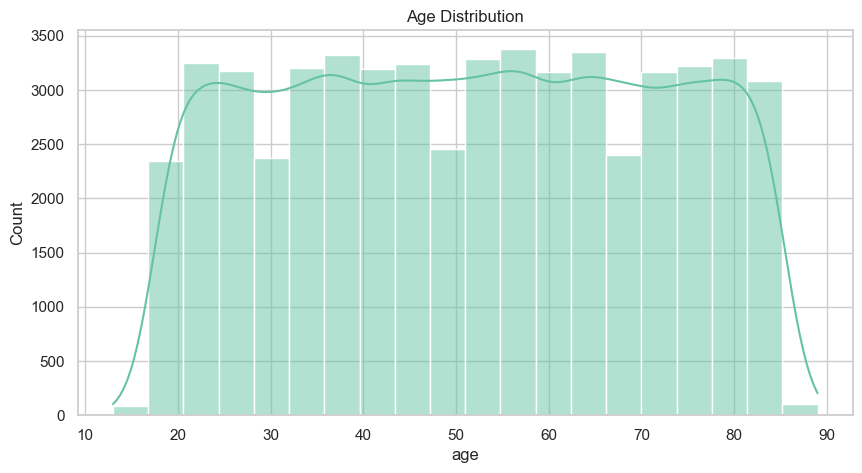

In [9]:
# 6. Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

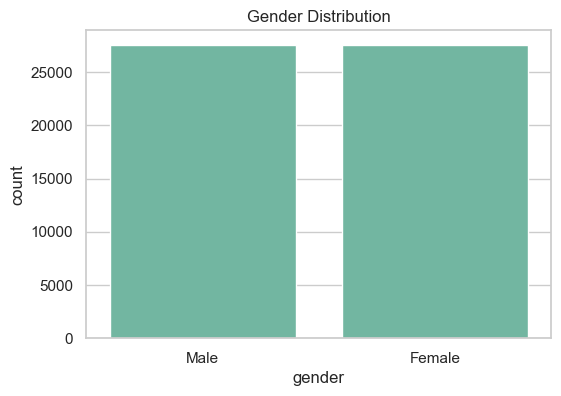

In [10]:
# 7. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()

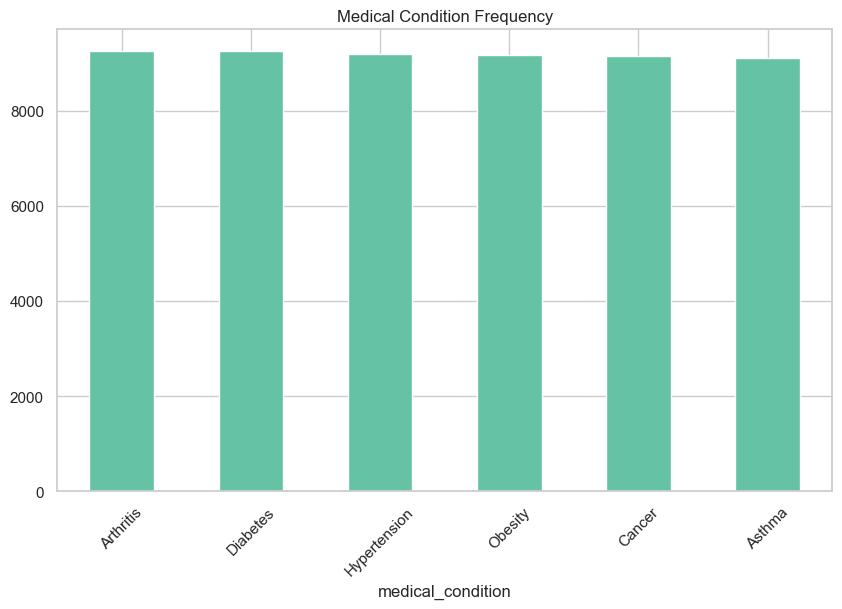

In [11]:
# 8. Medical condition counts
plt.figure(figsize=(10,6))
df["medical_condition"].value_counts().plot(kind="bar")
plt.title("Medical Condition Frequency")
plt.xticks(rotation=45)
plt.show()

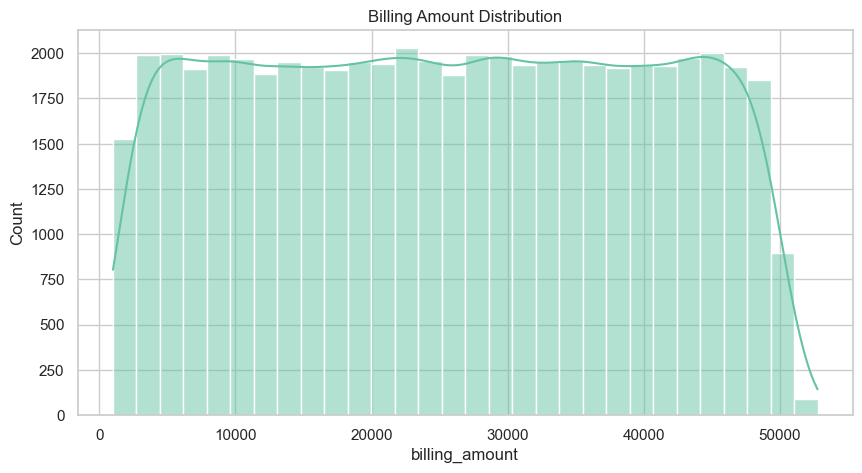

In [12]:
# 9. Billing distribution
plt.figure(figsize=(10,5))
sns.histplot(df["billing_amount"], bins=30, kde=True)
plt.title("Billing Amount Distribution")
plt.show()

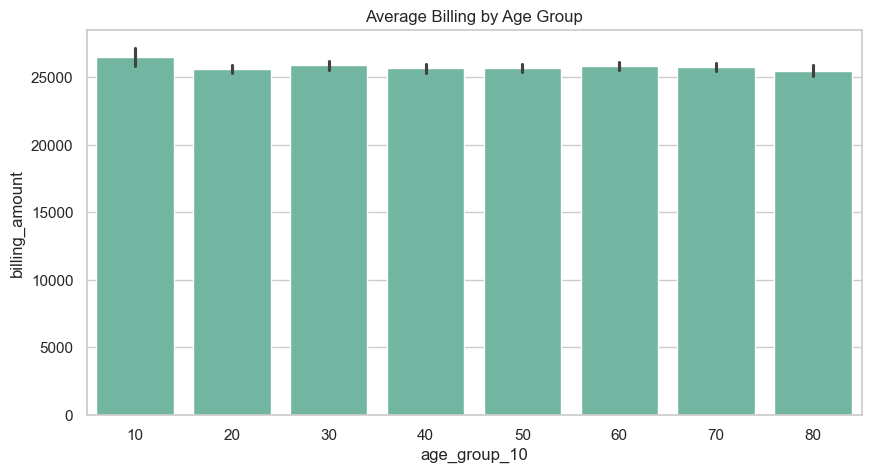

In [13]:
# 10. Billing by age group (10-year)
plt.figure(figsize=(10,5))
sns.barplot(x="age_group_10", y="billing_amount", data=df, estimator=np.mean)
plt.title("Average Billing by Age Group")
plt.show()

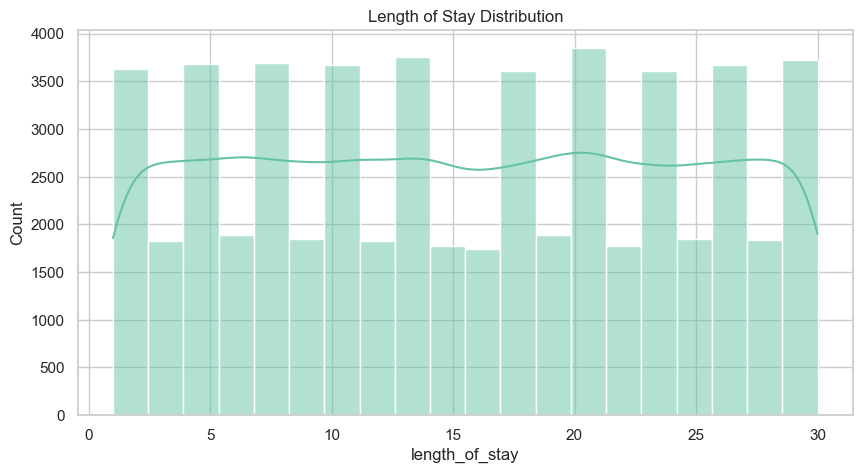

In [14]:
# 11. Length of stay distribution
plt.figure(figsize=(10,5))
sns.histplot(df["length_of_stay"], bins=20, kde=True)
plt.title("Length of Stay Distribution")
plt.show()

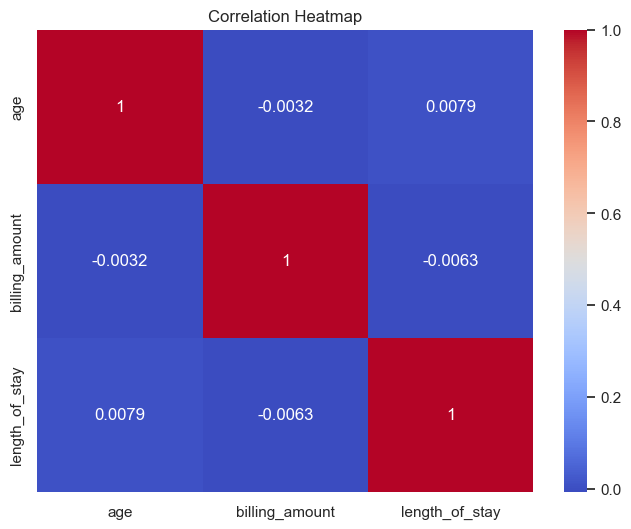

In [15]:
# 12. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["age", "billing_amount", "length_of_stay"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

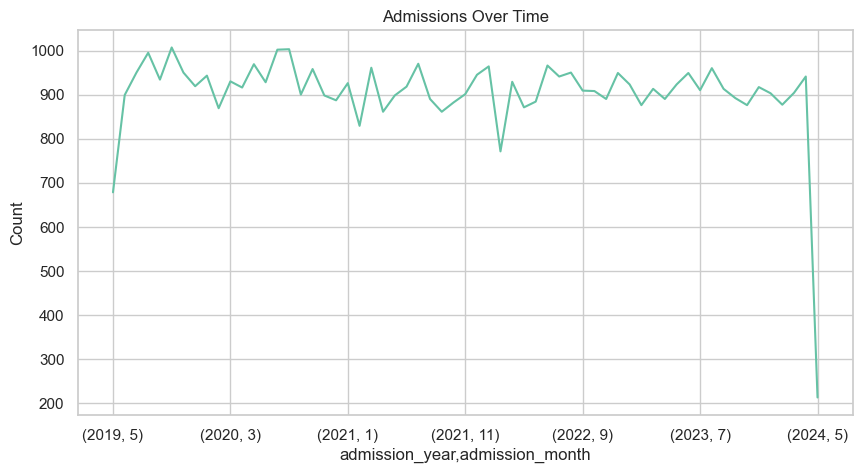

In [16]:
# 13. Admissions over time
plt.figure(figsize=(10,5))
df.groupby(["admission_year", "admission_month"]).size().plot()
plt.title("Admissions Over Time")
plt.ylabel("Count")
plt.show()